### PCA - Analisis de componentes principales

link referencia: https://www.cienciadedatos.net/documentos/py19-pca-python.html#:~:text=El%20an%C3%A1lisis%20de%20componentes%20principales,vez%20que%20conserva%20su%20informaci%C3%B3n.

#### Carga de datos

In [1]:
# Importamos librerias a utilizar
import pandas as pd
import numpy as np
#Graficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns
#PCA
# ==============================================================================
import statsmodels.api as sm
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lectura del csv
df_air = pd.read_csv('Airlines.csv', sep=',')
df_air.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [3]:
df_air.drop(df_air[df_air.Length == 0].index, inplace=True)
df_air.shape

(539379, 9)

#### Exploracion inicial

In [4]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539379 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539379 non-null  int64 
 1   Airline      539379 non-null  object
 2   Flight       539379 non-null  int64 
 3   AirportFrom  539379 non-null  object
 4   AirportTo    539379 non-null  object
 5   DayOfWeek    539379 non-null  int64 
 6   Time         539379 non-null  int64 
 7   Length       539379 non-null  int64 
 8   Delay        539379 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 41.2+ MB


In [5]:
#Comenzamos con la preparacion de nuestros datos
df_dummy = pd.get_dummies(df_air, drop_first=True)
df_dummy

,id,Flight,DayOfWeek,Time,Length,Delay,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,1,269,3,15,205,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1558,3,15,222,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2400,3,20,165,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2466,3,20,195,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,108,3,30,202,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,178,5,1439,326,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
539379,539380,398,5,1439,305,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,539381,609,5,1439,255,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539381,539382,78,5,1439,313,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Separamos los datos de entrada de la salida
X = df_dummy.drop('Delay', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.Delay #Defino el Target

#### Divimos el dataset.

En este caso utilizaremos:
- El 70% del mismo para el entrenamiento de los distintos algoritmos.
- El 30% restante como test de los algoritmos.

In [7]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11) 

In [9]:
#Normalizamos los datos para que PCA funcione mejor!
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

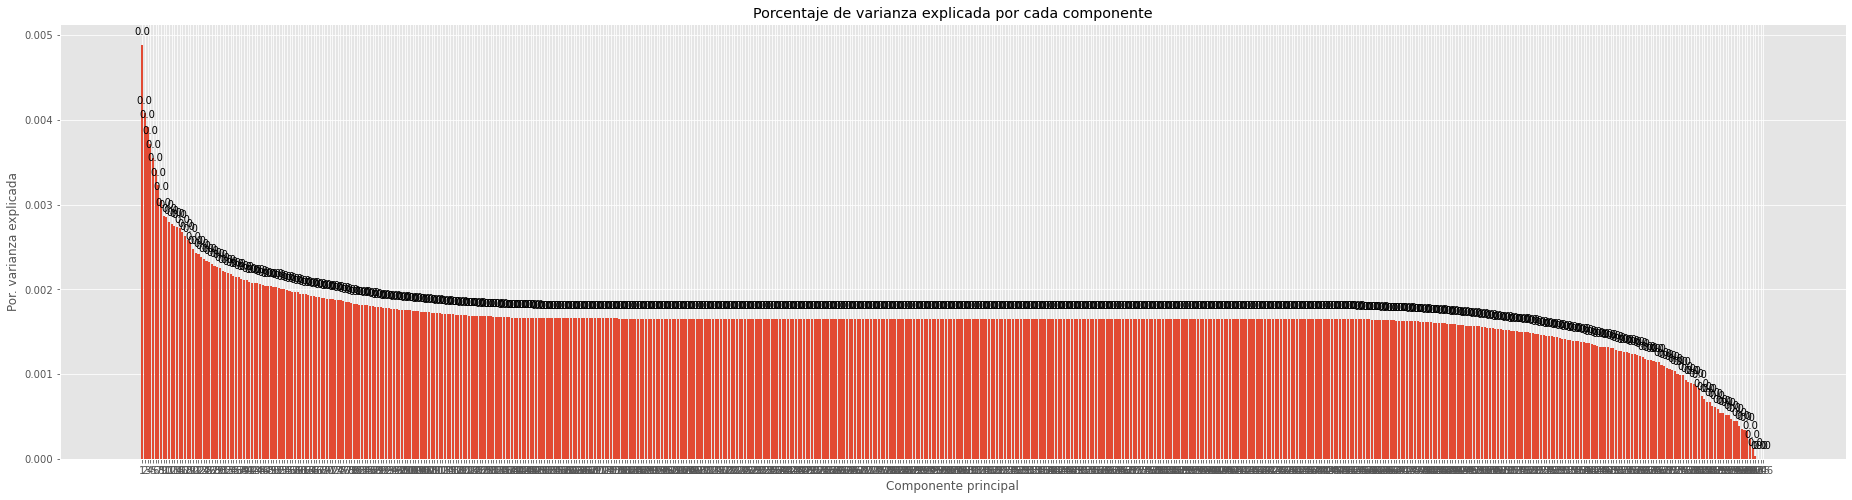

In [21]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 8))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_dummy.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
#ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');



In [32]:
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.00488742, 0.00896389, 0.01287603, 0.01658979, 0.0201379 ,
       0.02354116, 0.02676902, 0.02982446, 0.03269086, 0.03554084,
       0.03833496, 0.04110434, 0.04385582, 0.04659321, 0.04931826,
       0.05198932, 0.05461363, 0.05719822, 0.0597562 , 0.06222724,
       0.06465265, 0.0670728 , 0.06945775, 0.07182099, 0.07415085,
       0.07647527, 0.07877752, 0.08105836, 0.08332638, 0.08558102,
       0.08780081, 0.09000188, 0.09219441, 0.09437184, 0.09653204,
       0.09867695, 0.10082112, 0.10294594, 0.1050614 , 0.10716914,
       0.10925704, 0.11133666, 0.11341164, 0.11548382, 0.11755033,
       0.11959961, 0.12163836, 0.12367353, 0.12570717, 0.12773975,
       0.12976694, 0.13178475, 0.13379179, 0.13579186, 0.13778945,
       0.13977121, 0.14174295, 0.14371329, 0.145677  , 0.14762738,
       0.14957734, 0.15151845, 0.15344866, 0.15537311, 0.15729638,
       0.15920692, 0.1611137 , 0.16301469, 0.16491043, 0.16680099,
       0.16868577, 0.17056935, 0.17244563, 0.17431968, 0.17618

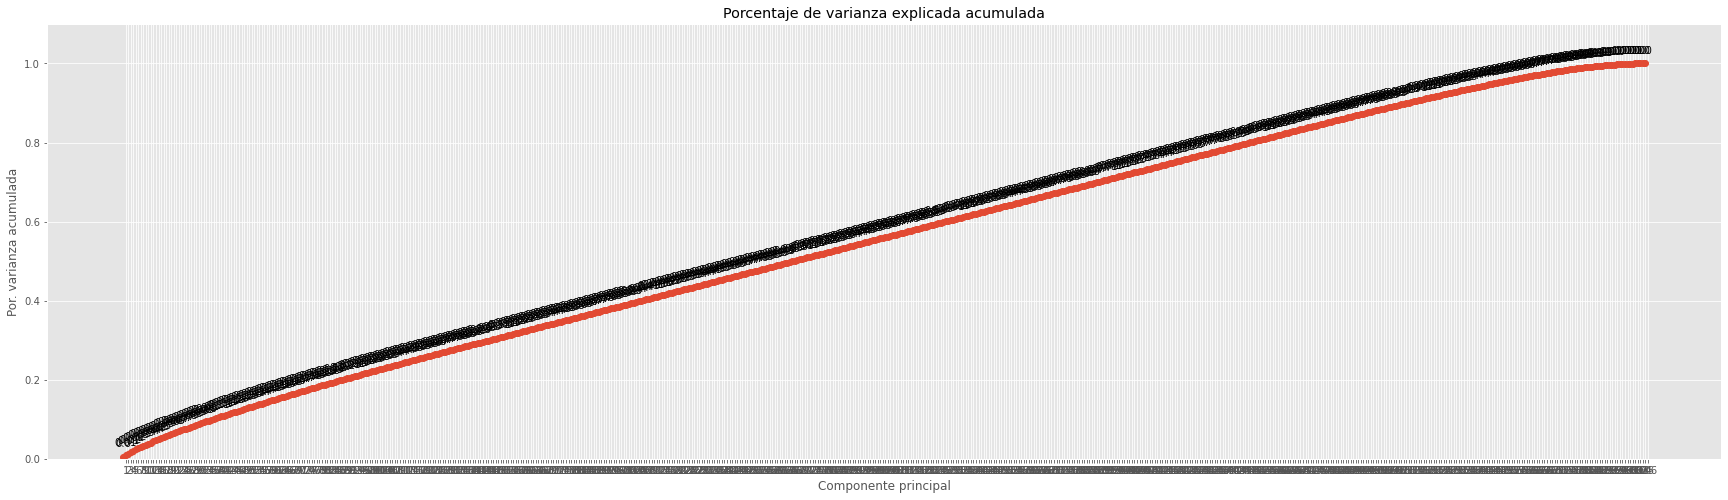

In [31]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 8))
ax.plot(
    np.arange(len(df_dummy.columns)-1),
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_dummy.columns)), prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=400)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [36]:
#Calculo el accuracy en Test
from sklearn.metrics import accuracy_score, precision_score

test_accuracy = accuracy_score(y_test, y_pred)
test_prec = precision_score(y_test, y_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precisión sobre la evaluación:',test_prec)

% de aciertos sobre el set de evaluación: 0.6155833240634309
% de precisión sobre la evaluación: 0.7255422554225542
